In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


[[4.53412664]
 [2.96952556]]
[[ 4.53412664]
 [10.47317776]]


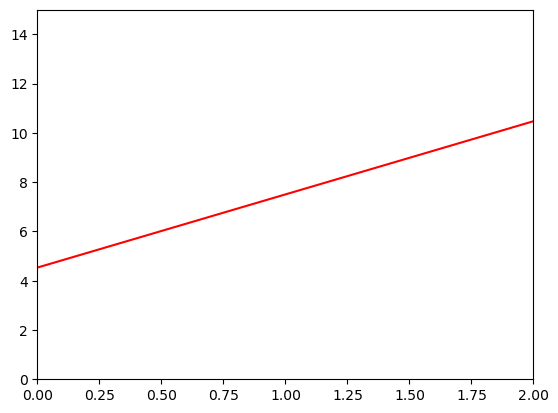

In [69]:
# linear regression math 
# y= 4 + 3x1 + noise
X = 2 * np.random.rand(100,1)
y = 4 + 3 *X + np.random.rand(100,1)
#plt.scatter(X,y)

# y = mx+c, compute m
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)


X_new = np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(X_new)

[4.61256141]
[[2.93393707]]


array([[ 4.61256141],
       [10.48043556]])

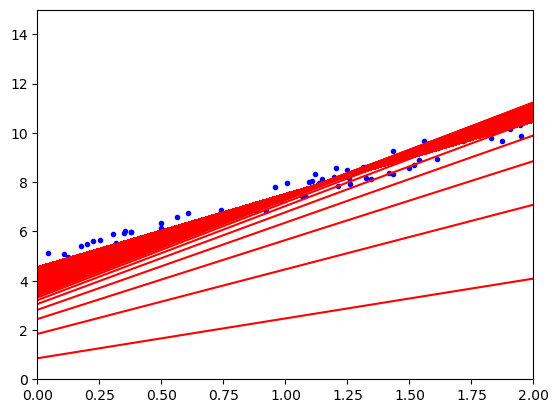

array([[4.53412664],
       [2.96952556]])

In [73]:
#Batch Gradient descent
eta = 0.1
n_iterations = 1000
m =100
theta = np.random.randn(2,1)
X_new_list = []
y_predict_list = []

for iterations in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    
    X_new = np.array([[0],[2]])
    X_new_b=np.c_[np.ones((2,1)), X_new]
    y_predict=X_new_b.dot(theta)
    X_new_list.append(X_new)
    y_predict_list.append(y_predict)



plt.plot(X, y, "b.")

for y_predict_l in y_predict_list:
    plt.plot(X_new, y_predict_l, "r-")

plt.axis([0,2,0,15])
plt.show()

theta

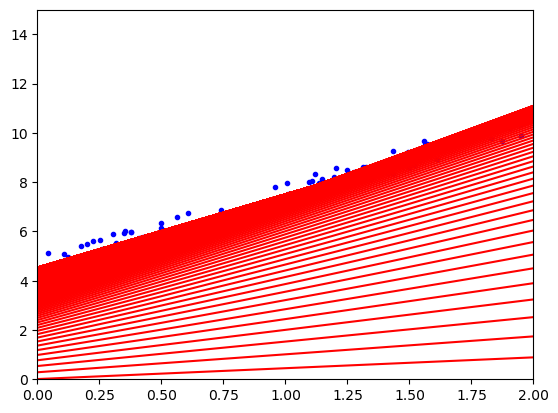

array([[4.53166832],
       [2.97175652]])

In [76]:
#Batch Gradient descent
eta = 0.02
n_iterations = 1000
m =100
theta = np.random.randn(2,1)
X_new_list = []
y_predict_list = []

for iterations in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    X_new = np.array([[0],[2]])
    X_new_b=np.c_[np.ones((2,1)), X_new]
    y_predict=X_new_b.dot(theta)
    X_new_list.append(X_new)
    y_predict_list.append(y_predict)



plt.plot(X, y, "b.")

for y_predict_l in y_predict_list:
    plt.plot(X_new, y_predict_l, "r-")

plt.axis([0,2,0,15])
plt.show()

theta

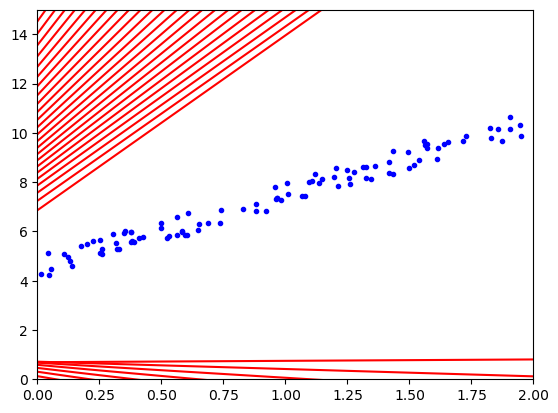

array([[-3.30363446e+11],
       [-3.64030086e+11]])

In [77]:
#Batch Gradient descent
eta = 0.5
n_iterations = 1000
m =100
X_new_list = []
y_predict_list = []

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    X_new = np.array([[0],[2]])
    X_new_b=np.c_[np.ones((2,1)), X_new]
    y_predict=X_new_b.dot(theta)
    X_new_list.append(X_new)
    y_predict_list.append(y_predict)


plt.plot(X, y, "b.")

for y_predict_l in y_predict_list:
    plt.plot(X_new, y_predict_l, "r-")

plt.axis([0,2,0,15])
plt.show()

theta

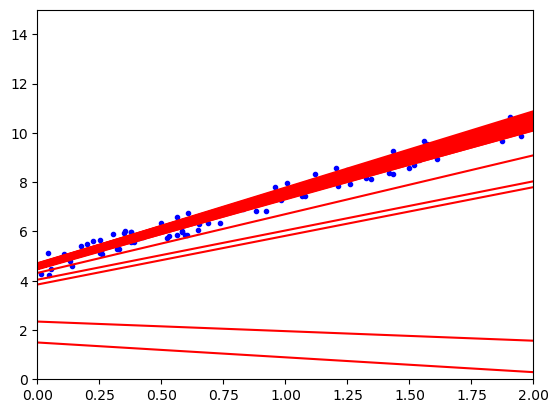

In [84]:
n_epochs = 50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

X_new_list = []
y_predict_list = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi=  y[random_index:random_index+1]

        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

        X_new = np.array([[0],[2]])
        X_new_b=np.c_[np.ones((2,1)), X_new]
        y_predict=X_new_b.dot(theta)
        X_new_list.append(X_new)
        y_predict_list.append(y_predict)


plt.plot(X, y, "b.")

for y_predict_l in y_predict_list:
    plt.plot(X_new, y_predict_l, "r-")

plt.axis([0,2,0,15])
plt.show()

In [90]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=50,eta0=0.1,penalty=None)
model.fit(X,y.ravel())
print(model.intercept_)
print(model.coef_)



[4.4997498]
[2.96697644]
